In [2]:
!pip install wordcloud --quiet

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from os import path
from PIL import Image

# import plotly modules
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [4]:
players = pd.read_csv("D:\TELECHARGEMENT/WorldCupPlayers.csv")
matches = pd.read_csv("D:\TELECHARGEMENT/WorldCupMatches.csv")
world_cup = pd.read_csv("D:\TELECHARGEMENT/WorldCups.csv")

In [5]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [7]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [8]:
players = players.dropna()
matches = matches.dropna()
world_cup = world_cup.dropna()

In [9]:
players = players.replace('Germany FR' , 'Germany')
matches = matches.replace('Germany FR' , 'Germany')
world_cup = world_cup.replace('Germany FR' , 'Germany')

In [10]:
world_cup['Attendance'] = world_cup['Attendance'].str.replace('.' , '').astype('int64')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1368\724666460.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [11]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


In [12]:
matches['Home Team Name'].value_counts()

Brazil                        82
Germany                       75
Italy                         57
Argentina                     54
England                       35
                              ..
Wales                          1
Norway                         1
rn">United Arab Emirates       1
Haiti                          1
rn">Bosnia and Herzegovina     1
Name: Home Team Name, Length: 77, dtype: int64

In [13]:
names = matches[matches['Home Team Name'].str.contains('Tunisia')]['Home Team Name'].value_counts()
names

Tunisia    4
Name: Home Team Name, dtype: int64

## Which countries had won the cup ?

In [14]:
world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


Text(0.5, 1.0, 'Number of podium by country')

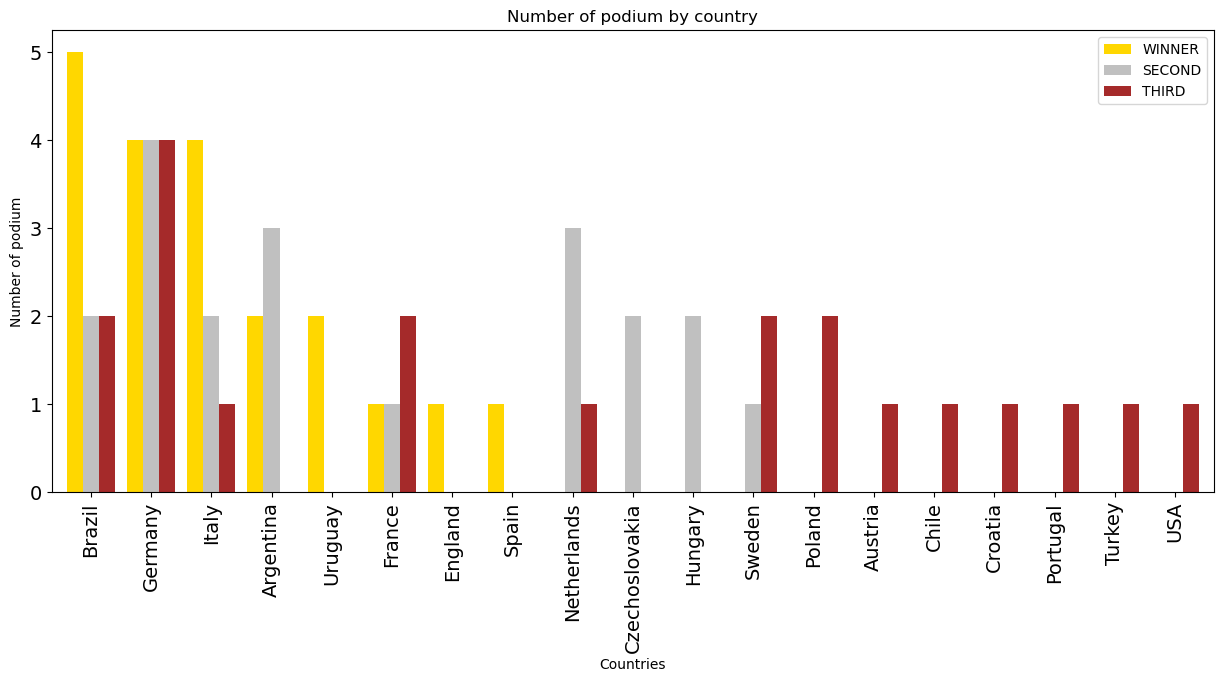

In [15]:
gold = world_cup['Winner']
silver = world_cup['Runners-Up']
bronze = world_cup['Third']

gold_count = pd.DataFrame(gold.value_counts())
silver_count = pd.DataFrame(silver.value_counts())
bronze_count = pd.DataFrame(bronze.value_counts())

podium_count = gold_count.join(silver_count , how ='outer').join(bronze_count , how ='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by = ['WINNER', 'SECOND', 'THIRD'] , ascending = False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind = 'bar' ,
                  color = ['gold' , 'silver' , 'brown'], figsize = (15 , 6),fontsize = 14 , 
                  width = 0.8 , align = 'center')

plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')


## Number of goal per country

In [16]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1368\3555997698.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1368\3555997698.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 1.0, 'Top 10 of Number of goals by country')

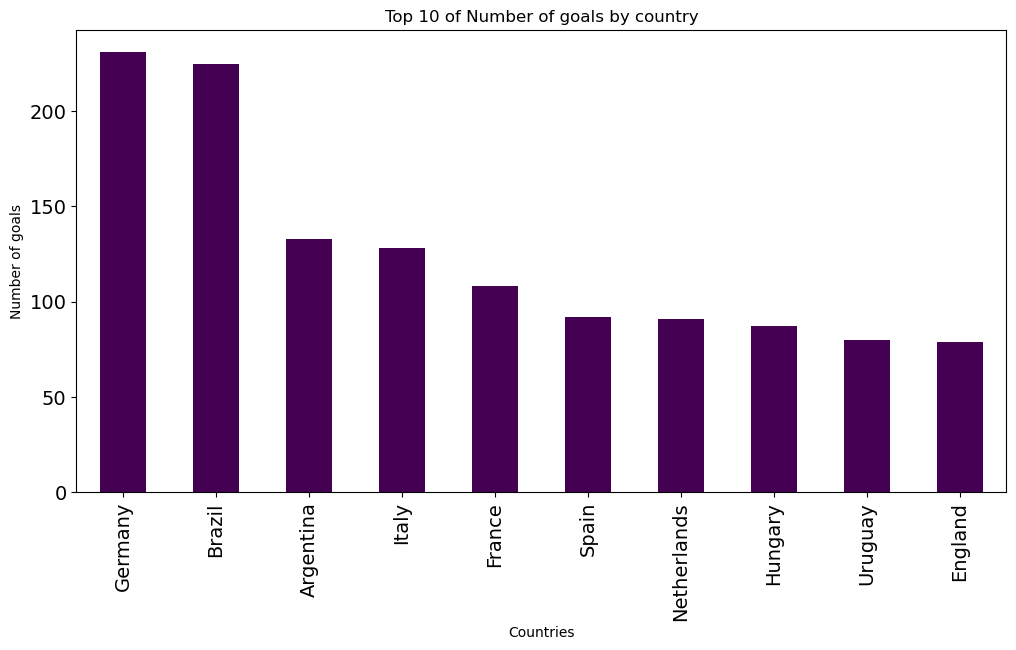

In [17]:
home = matches[['Home Team Name' , 'Home Team Goals']].dropna()
away = matches[['Away Team Name' , 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country
goal_per_country = goal_per_country.append(home.rename(index=str , columns = {'Home Team Name' : 'countries' , 
                                                                             'Home Team Goals' : 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 
                                                                           'Away Team Goals': 'goals'}))
goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), 
                           fontsize=14, colormap='viridis')
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')

## Attendance, number of teams, goals and matchs per cup

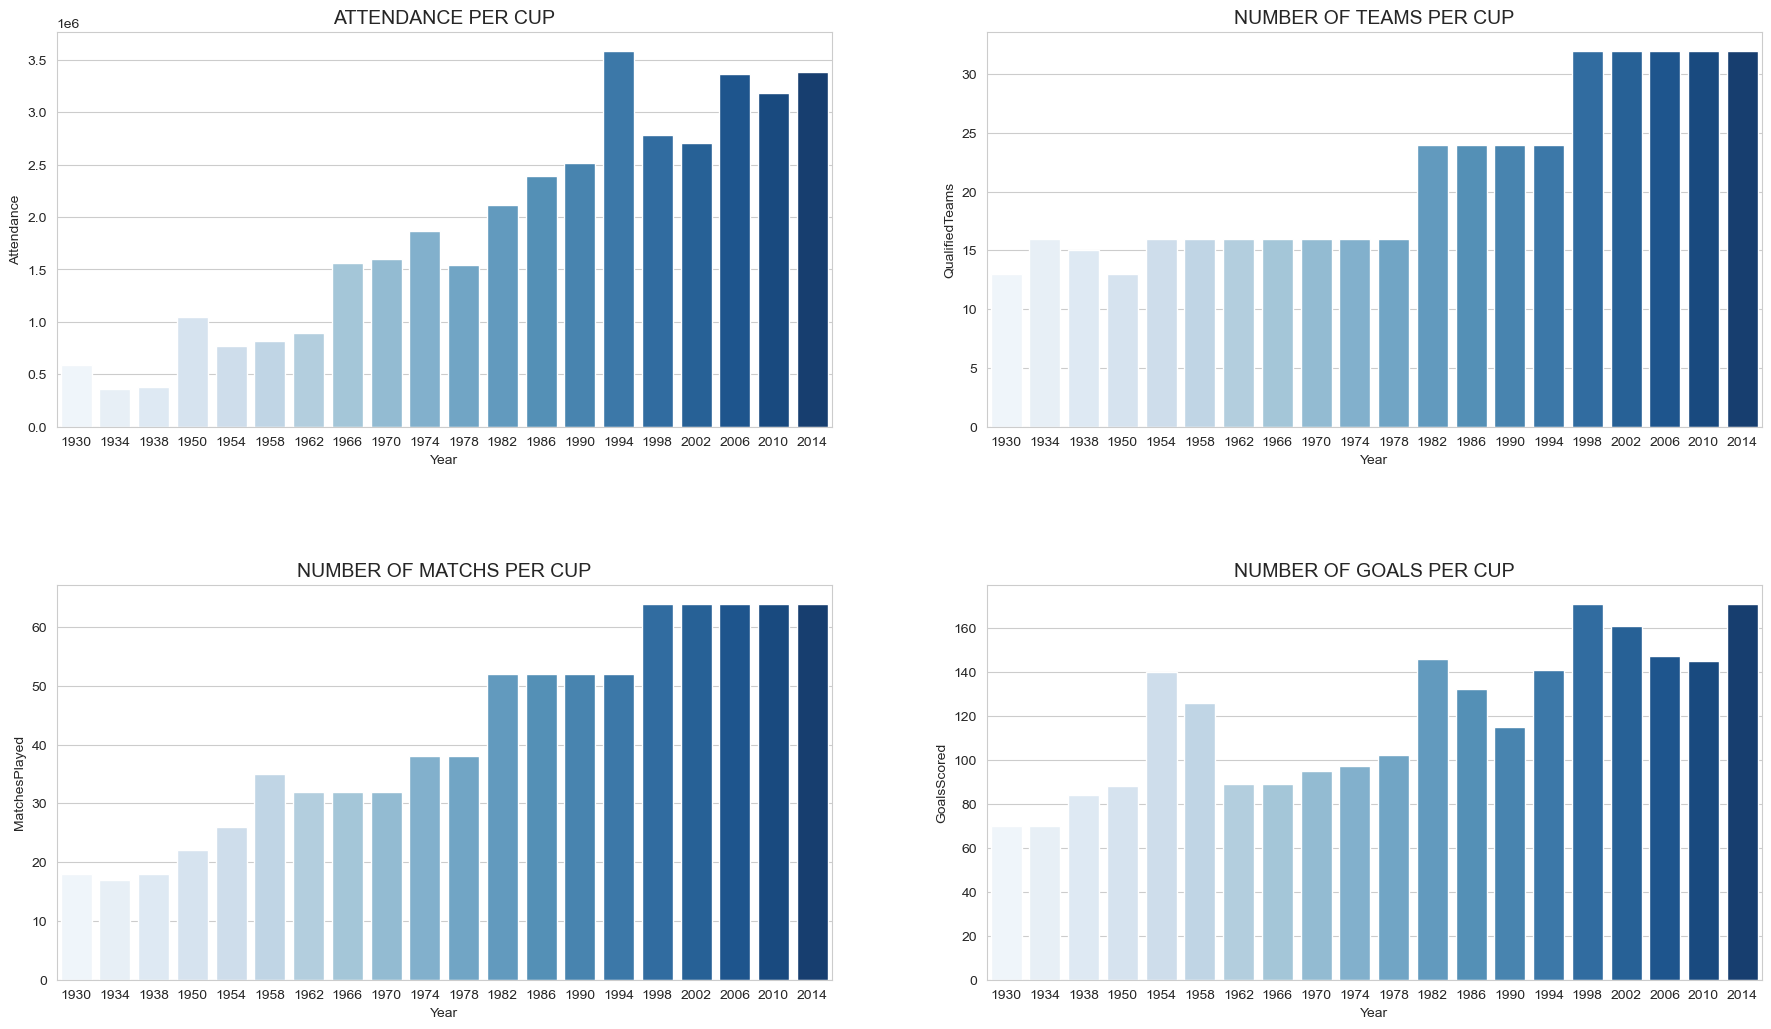

In [18]:
plt.figure(figsize = (22,12))
sns.set_style("whitegrid")
plt.subplot(221)
g1 = sns.barplot(x="Year", y="Attendance", data=world_cup, palette="Blues")
g1.set_title("ATTENDANCE PER CUP", fontsize=14)

plt.subplot(222)
g2 = sns.barplot(x="Year", y="QualifiedTeams", data=world_cup, palette="Blues")
g2.set_title("NUMBER OF TEAMS PER CUP", fontsize=14)

plt.subplot(223)
g2 = sns.barplot(x="Year", y="MatchesPlayed", data=world_cup, palette="Blues")
g2.set_title("NUMBER OF MATCHS PER CUP", fontsize=14)

plt.subplot(224)
g2 = sns.barplot(x="Year", y="GoalsScored", data=world_cup, palette="Blues")
g2.set_title("NUMBER OF GOALS PER CUP", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

## Wordcloud of teams that have the most wins
To make the wordcloud I add 3 columns into the matches dataset :

- result : either if there is a winner or the result is a draw
- winner : the winner team
- looser : the looser team

In [19]:
winner_by_score_home = matches['Home Team Goals'] > matches['Away Team Goals']
winner_by_score_away = matches['Home Team Goals'] < matches['Away Team Goals']

win_by_score = winner_by_score_home | winner_by_score_away
win_penalties = matches['Win conditions'].str.len() > 1

win_team_home = np.where(winner_by_score_home, matches['Home Team Name'], '')
win_team_away = np.where(winner_by_score_away, matches['Away Team Name'], '')

win_cond = matches['Win conditions'].str.split(pat='\(|\)|-', expand=True)
win_team_penalties = np.where(win_cond[0].str.len() > 1, 
                     np.where(win_cond[1] > win_cond[2], 
                              matches['Home Team Name'], matches['Away Team Name']), '')

win_team = np.where(win_team_home != '', win_team_home, 
                    np.where(win_team_away != '', win_team_away, win_team_penalties))

matches.loc[:,'result'] = np.where(win_by_score, 'win', np.where(win_penalties, 'win', 'draw'))
matches.loc[:,'Winner'] = win_team
matches.loc[:,'Looser'] = np.where(matches['result'] != 'draw', 
                                        np.where(win_team == matches['Home Team Name'], 
                                                 matches['Away Team Name'],
                                                 matches['Home Team Name']), '')

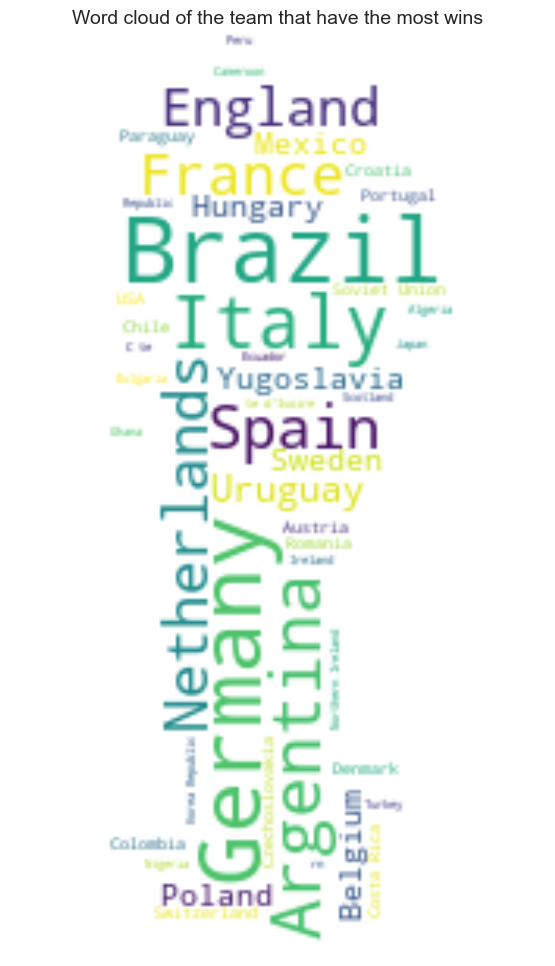

In [20]:
cup_mask = np.array(Image.open(r"C:\Users\Douik\Downloads\images.jpg"))

#footballer_mask = np.array(Image.open("../input/mask-image-fifa-cup/footballer.jpg"))
# ball_mask = np.array(Image.open("../input/mask-image-fifa-cup/ball.jpg"))

wc_cup = WordCloud(background_color="white", max_words=2000, mask=cup_mask)
#wc_footballer = WordCloud(background_color="white", max_words=2000, mask=footballer_mask)
#wc_ball = WordCloud(background_color="white", max_words=2000, mask=ball_mask)

winner_text = ' '.join(matches['Winner'].dropna().tolist())

wc_cup.generate(winner_text)

plt.figure(figsize = (21,12))
sns.set_style("whitegrid")

plt.title('Word cloud of the team that have the most wins', fontsize=14)
plt.imshow(wc_cup, interpolation='bilinear')
plt.axis("off")

plt.show()

## Which teams scored the most goals per cup ?
So I want to make an analysis about the number of goals per Team per cup and then of all the cups so I need to create a new dataset based on the world_cups_matches set. I will perform I a kind of "map reduce" opperation :

- 1st : I extract the year, home team name and home team goals and sum the goals per year and team name
- 2nd : Same opperation but with the away team
- 3rd : Join it by team name and year

In [21]:
home_team_goal = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
away_team_goal = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
team_goal = pd.concat([home_team_goal, away_team_goal], axis=1)
team_goal = team_goal.fillna(0)
team_goal['goals'] = team_goal['Home Team Goals'] + team_goal['Away Team Goals']
team_goal = team_goal.drop(['Home Team Goals', 'Away Team Goals'], axis=1)
team_goal = pd.DataFrame.from_dict(team_goal.to_dict()).reset_index().rename(index=str, columns={'level_0':'Year', 'level_1':'Team'})

team_goal = team_goal.sort_values(by=['Year', 'goals'], ascending=[True, False])
team_goal_top_5 = team_goal.groupby('Year').head(5)

In [22]:
x, y = team_goal['Year'].values, team_goal['goals'].values

data = []

for team in team_goal_top_5['Team'].drop_duplicates().values :
    year = team_goal_top_5[team_goal_top_5['Team'] == team]['Year']
    goals = team_goal_top_5[team_goal_top_5['Team'] == team]['goals']
    data.append(
        go.Bar(
            x=year,
            y=goals,
            name = team,
        )
    )

layout = go.Layout(
    barmode = "stack", 
    title = "Top 5 teams which scored the most goals",
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='pyplot-fifa')